In [1]:
import scipy as scp
from numpy import random
from numpy import linalg

ncity=100

# random coordinates in 2D for n-cities
R = random.random((ncity,2))
city = range(ncity)

In [2]:
R[:10] #100개의 도시에 대해 랜덤한 좌표[x,y]가 부여되었다.

array([[0.4484244 , 0.4032561 ],
       [0.13313561, 0.2296996 ],
       [0.70819019, 0.48134526],
       [0.32897816, 0.7301454 ],
       [0.39378885, 0.71745403],
       [0.07789212, 0.33149644],
       [0.53431806, 0.74250279],
       [0.33362486, 0.18754843],
       [0.56509017, 0.33138757],
       [0.36263664, 0.87886163]])

In [4]:
# 두 도시의 거리를 계산하는 함수
def Distance(R1,R2):
    return linalg.norm(R1-R2)

#나열된 도시들의 총 거리를 계산하는 함수
def TotalDistance(city, R):
    dist=0
    for i in range(len(city)-1):
        dist += Distance(R[city[i]],R[city[i+1]])
    dist += Distance(R[city[-1]],R[city[0]])
    return dist

In [5]:
#그래프를 그리는 함수
def Plot(city, R, dist):
    Pt = [R[city[i]] for i in range(len(city))]
    Pt += [R[city[0]]]
    Pt = array(Pt)
    title('Total distance='+str(dist))
    plot(Pt[:,0],Pt[:,1],'o-')
    show()

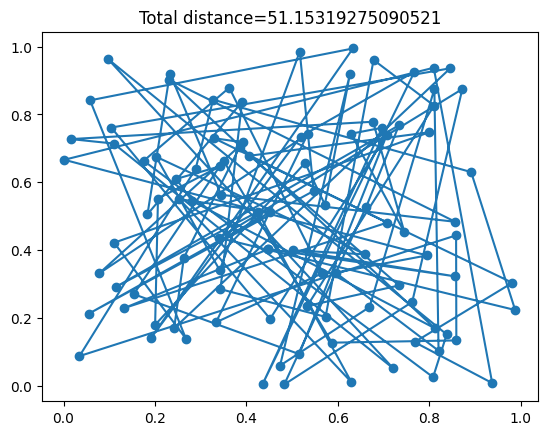

In [6]:
from pylab import *
Plot(city,R, TotalDistance(city,R))

In [7]:
#도시의 순서를 바꾸었을때와 바꾸지 않았을 때와의 거리의 차잇값을 구하는 함수
def CostSwap(R, city, n, ncity):
  original_ndist = (Distance(R[city[n-1]],R[city[n]]) + Distance(R[city[(n+1)%ncity]],R[city[(n+2)%ncity]]))
  new_ndist = (Distance(R[city[n-1]],R[city[(n+1)%ncity]]) + Distance(R[city[n]],R[city[(n+2)%ncity]]))
  return new_ndist - original_ndist

In [8]:
#두 도시의 방문 순서를 바꾸는 함수
def Swap(city, n, ncity):
  new_city = city
  new_city[n], new_city[(n+1)%ncity] = new_city[(n+1)%ncity], new_city[n]
  return new_city

In [9]:
#전체 함수
def TravelingSalesman(city, R, maxSteps, maxAccepted, Tstart, fCool, maxTsteps):
    T = Tstart
    dist = TotalDistance(city,R)
    for t in range(maxTsteps):
      accepted = 0
      for i in range(maxSteps):
        # Try swap
        n = random.randint(0,ncity-1)
        de = CostSwap(R, city, n, ncity)
        if de < 0 or exp(-de/T) > rand():
          accepted += 1
          dist += de
          city = Swap(city, n, ncity)
        if accepted > maxAccepted:
          break
      T *= fCool
      Plot(city, R, dist)
      print("T=%10.5f , distance=%10.5f acc.steps=%d" % (T, dist,accepted))
      if accepted == 0:
        break
    return city

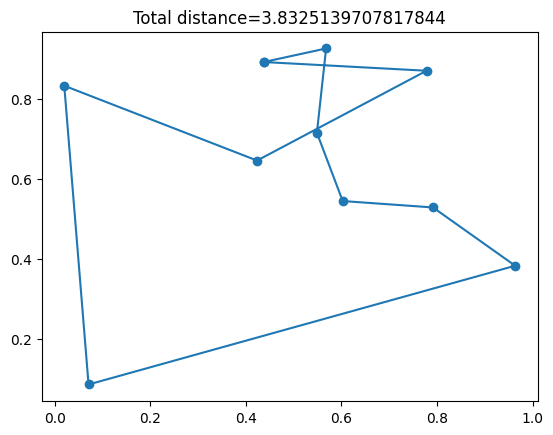

T=   0.18000 , distance=   3.83251 acc.steps=101


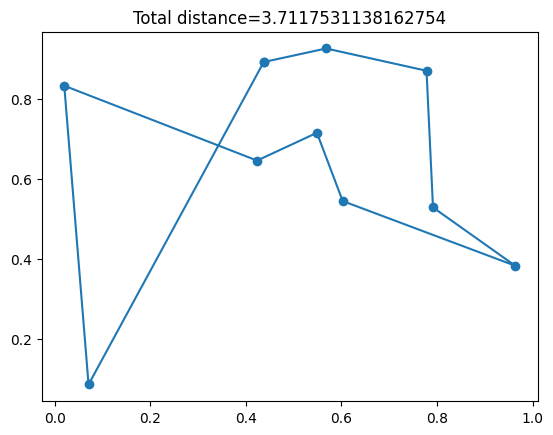

T=   0.16200 , distance=   3.71175 acc.steps=101


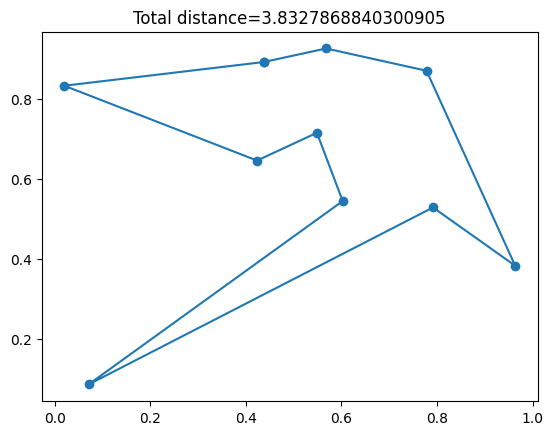

T=   0.14580 , distance=   3.83279 acc.steps=101


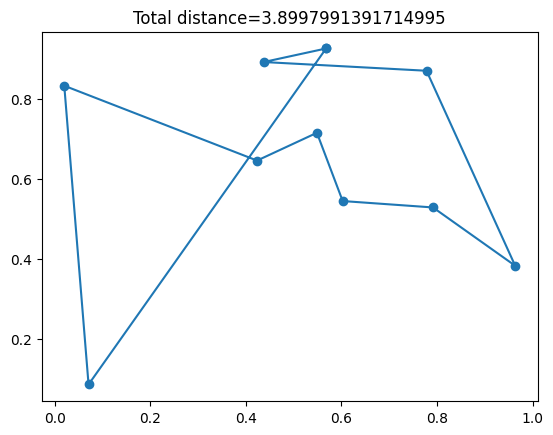

T=   0.13122 , distance=   3.89980 acc.steps=101


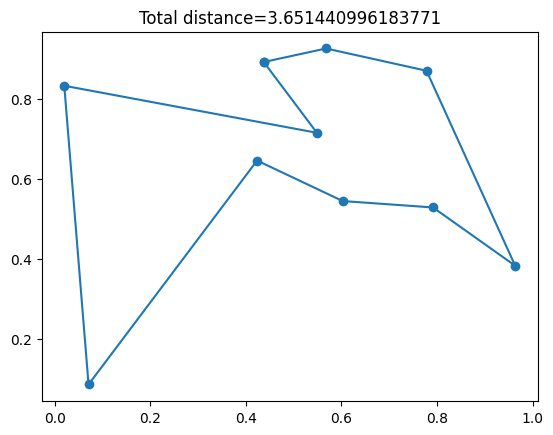

T=   0.11810 , distance=   3.65144 acc.steps=101


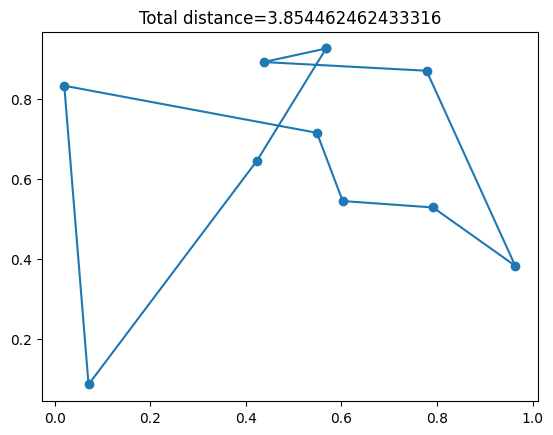

T=   0.10629 , distance=   3.85446 acc.steps=101


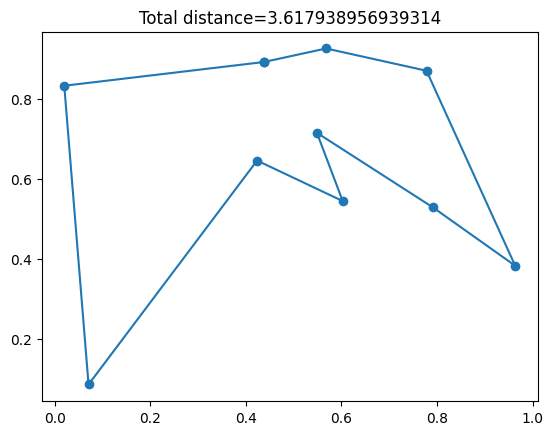

T=   0.09566 , distance=   3.61794 acc.steps=101


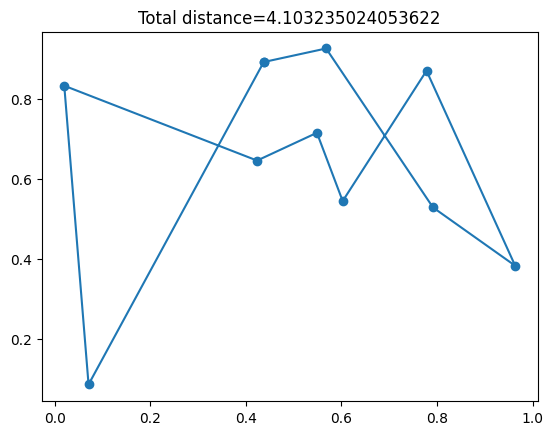

T=   0.08609 , distance=   4.10324 acc.steps=101


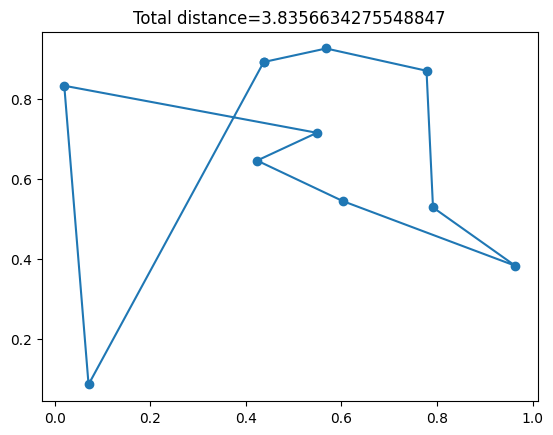

T=   0.07748 , distance=   3.83566 acc.steps=101


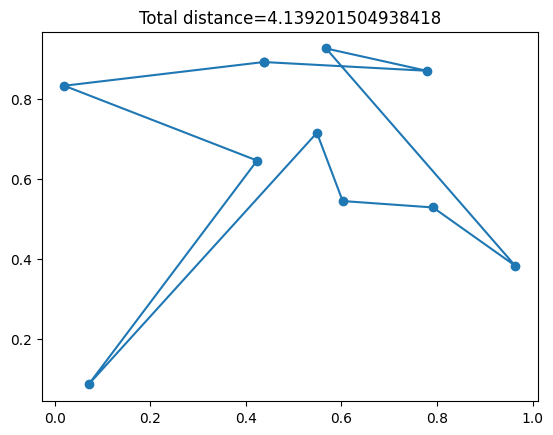

T=   0.06974 , distance=   4.13920 acc.steps=101


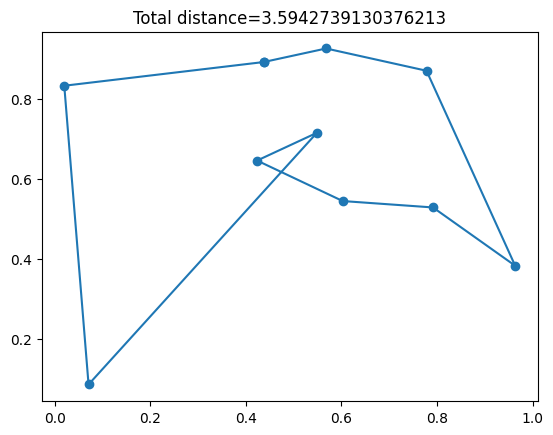

T=   0.06276 , distance=   3.59427 acc.steps=101


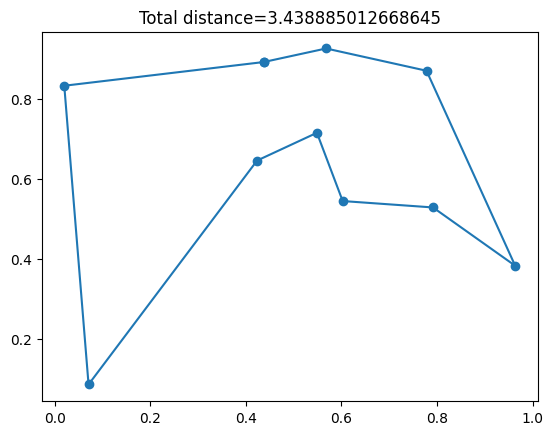

T=   0.05649 , distance=   3.43889 acc.steps=101


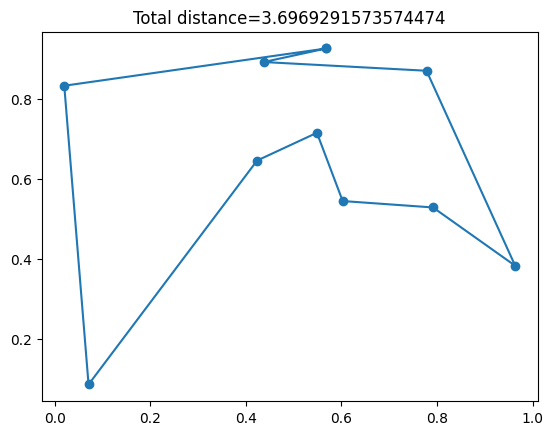

T=   0.05084 , distance=   3.69693 acc.steps=101


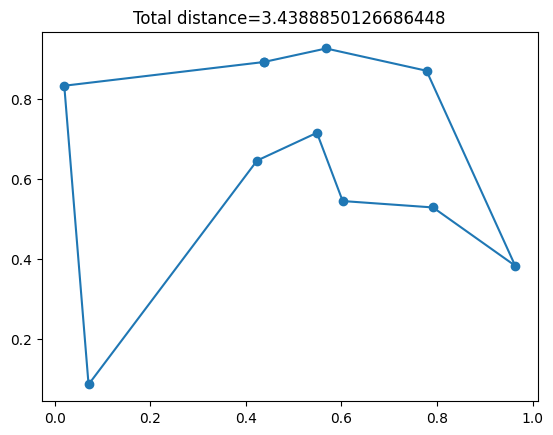

T=   0.04575 , distance=   3.43889 acc.steps=101


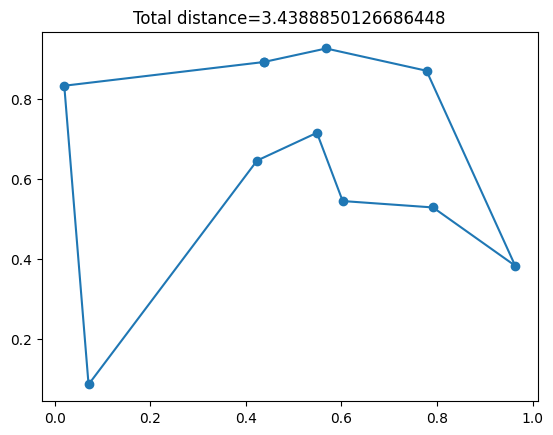

T=   0.04118 , distance=   3.43889 acc.steps=96


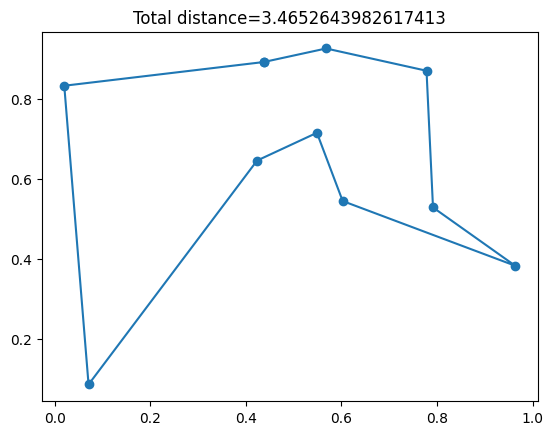

T=   0.03706 , distance=   3.46526 acc.steps=89


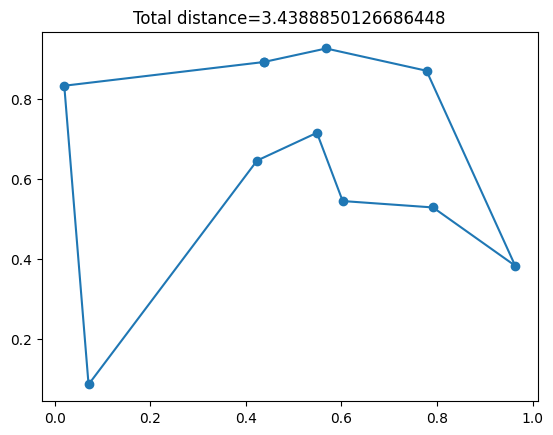

T=   0.03335 , distance=   3.43889 acc.steps=89


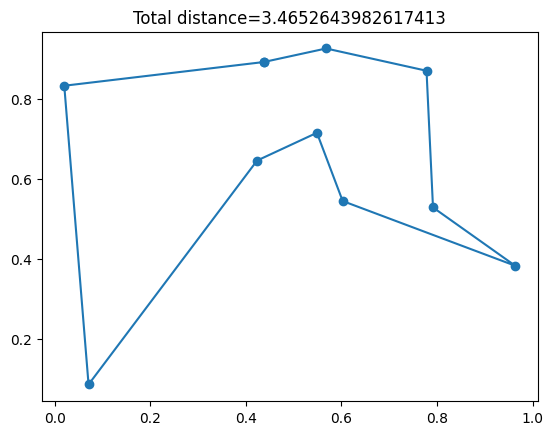

T=   0.03002 , distance=   3.46526 acc.steps=73


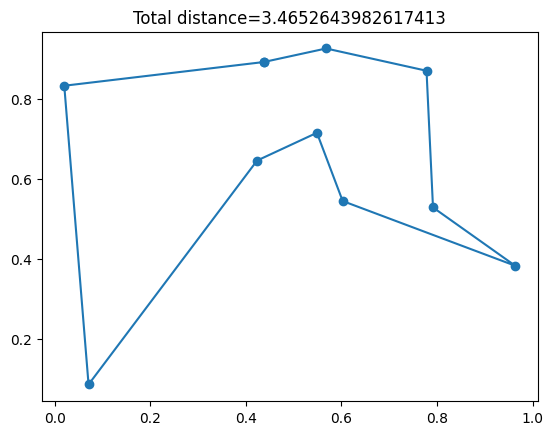

T=   0.02702 , distance=   3.46526 acc.steps=76


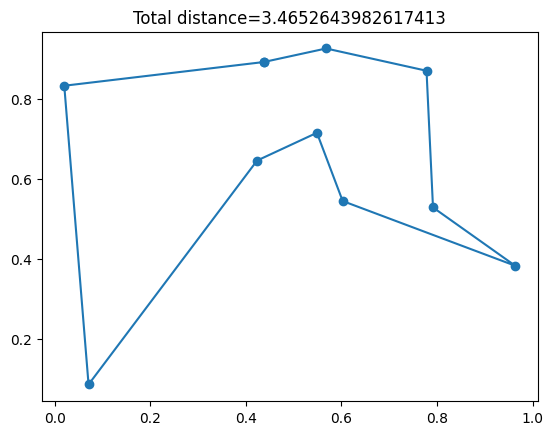

T=   0.02432 , distance=   3.46526 acc.steps=52


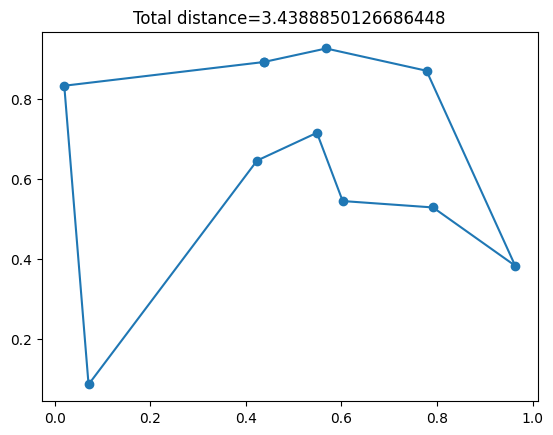

T=   0.02188 , distance=   3.43889 acc.steps=39


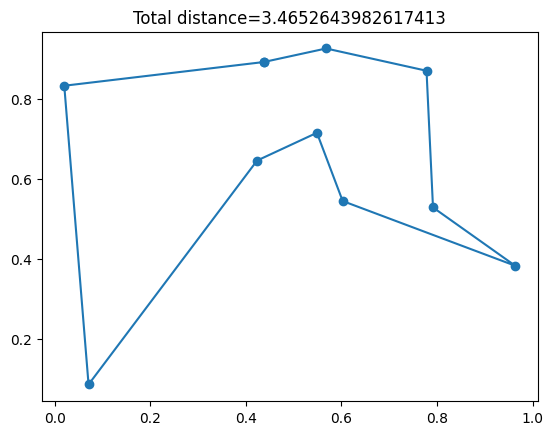

T=   0.01970 , distance=   3.46526 acc.steps=61


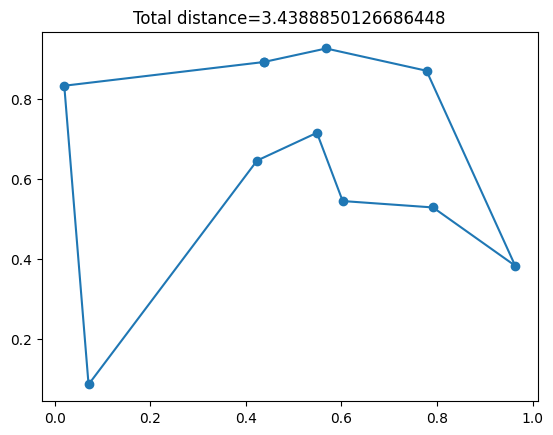

T=   0.01773 , distance=   3.43889 acc.steps=39


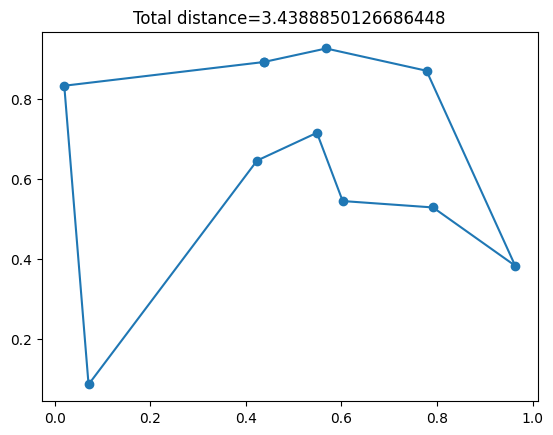

T=   0.01595 , distance=   3.43889 acc.steps=56


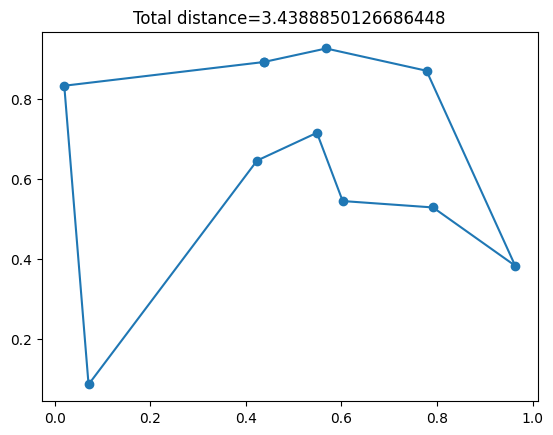

T=   0.01436 , distance=   3.43889 acc.steps=32


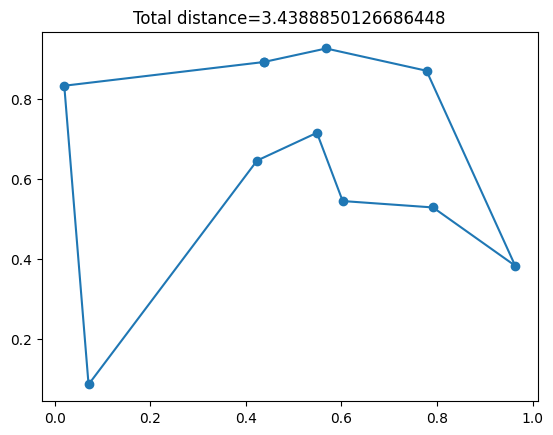

T=   0.01292 , distance=   3.43889 acc.steps=24


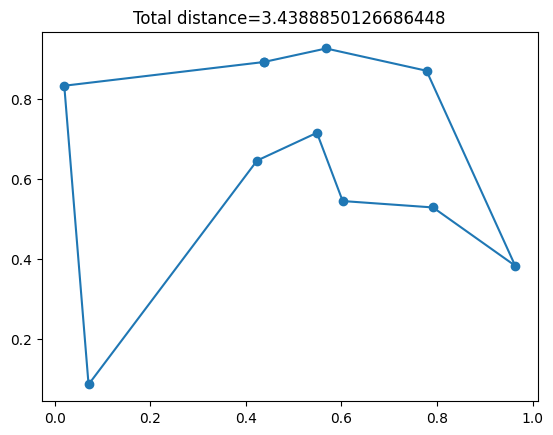

T=   0.01163 , distance=   3.43889 acc.steps=20


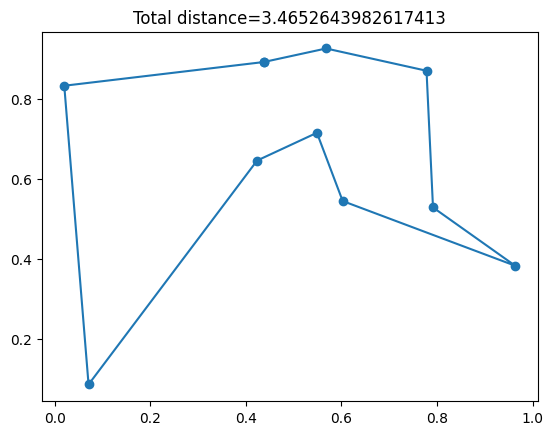

T=   0.01047 , distance=   3.46526 acc.steps=21


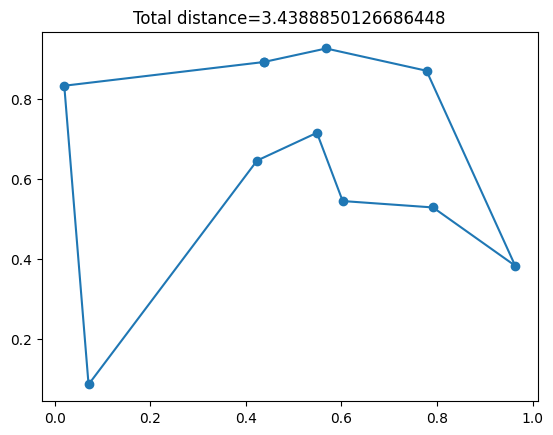

T=   0.00942 , distance=   3.43889 acc.steps=23


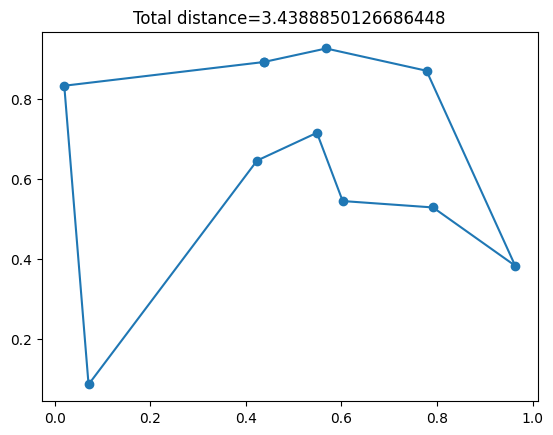

T=   0.00848 , distance=   3.43889 acc.steps=14


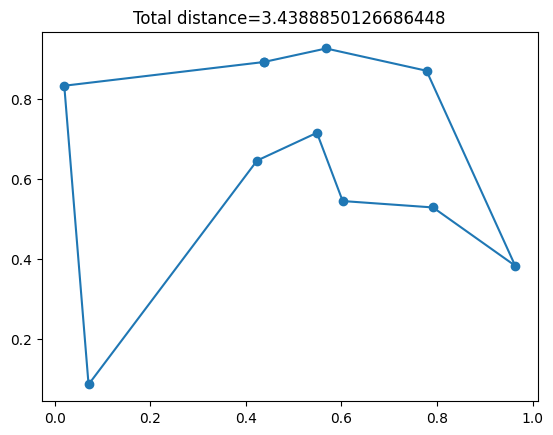

T=   0.00763 , distance=   3.43889 acc.steps=2


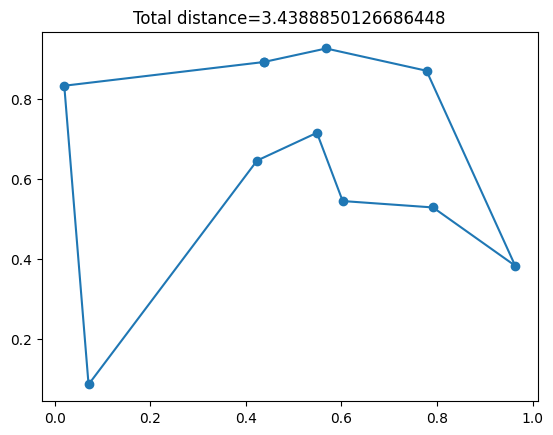

T=   0.00687 , distance=   3.43889 acc.steps=4


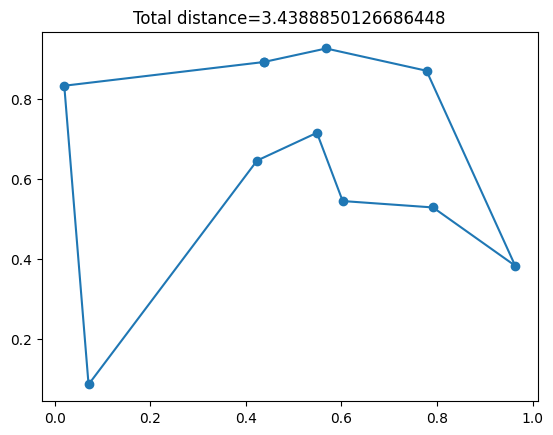

T=   0.00618 , distance=   3.43889 acc.steps=8


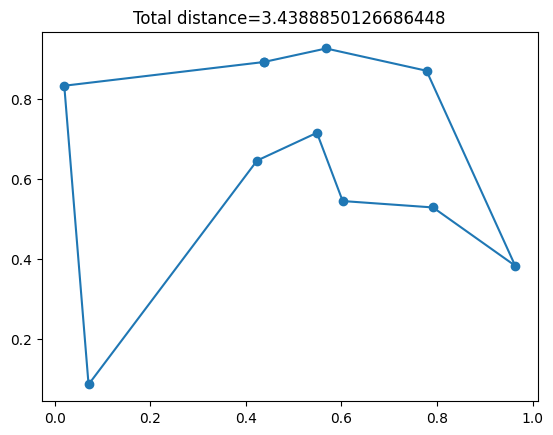

T=   0.00556 , distance=   3.43889 acc.steps=0


In [10]:
from numpy import random

ncity = 10
maxSteps = 100*ncity
maxAccepted = 10*ncity
Tstart = 0.2
fCool = 0.9
maxTsteps = 1000

random.seed(0)

R = random.random((ncity,2))
city = list(range(ncity))

ncity = TravelingSalesman(city, R, maxSteps, maxAccepted, Tstart, fCool, maxTsteps)

In [ ]:
#Total distance가 점점 줄어들어 3.4389로 값이 수렴한다. (최적화 된다.)

3